# assignment04

name : rocky Kim

student ID : 20152424

Git Address :

https://github.com/Epicevent/assignment04

# import packages and load data from "mnist_test.csv"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
file_data = "mnist_test.csv"
handle_file = open(file_data, "r")
global_data = handle_file.readlines()
handle_file.close()

size_row = 28  # height of the image
size_col = 28  # width of the image
count = 0
global_number_of_cluster = 10
global_num_image = len(global_data)
global_energy = list()
global_accuracy = list()

# variable Summary

 
global_energy : list consist of energy value of each step
global_accuracy : list consist of accuracy value of each step
global_centroid : center image of each label

                  numpy array (dtype: float ) 
                  shape : (global_number_of_cluster , (size_row* size_col) )

global_energy_matrix : numpy 2d array for caculating total energy and assigning new label.

                       definition >  
                       global_energy_matrix[i,j] = Euclidean Squared Distance[ith center,jth image] 

Euclidean Squared Distance is defined as

$$\sum_{i=0}^{n}{ (x_i - y_i)^2}$$

global_list_label_true   : the standard label for computing accuracy           

global_list_label_Kmean : the label from Kmean clustering algorithm 

                    definition > it is numpy array (dtype : int)
                    shape: ( number_of_image ,)
                    global_list_label[i] = the label of ith image
 
global_list_label_function : the np array to represent the function 
(it is not actually function!)

let f :global_list_label_function $X_{accuracy\_low} \to X_{accuracy\_high} $ (  bijective function )

  $$X = \{ 0,1,...,number\_of\_cluster-1 \} $$
purpose to use : to permutate label to caculate proper accuracy
it does not affect In clustering result
but it does affect in accuracy , 
forexample, if the list of label_kmean is {0 ,0 ,1 ,2 ,2 , 2} and the list of label_true is 
{2 ,2 ,1 ,0 ,0 ,0}   : assuming number_of_cluster = 3, number_of_image =6
   in that case we need to convert label_kmean to maximize accuracy
   $0\to2$,  $1\to1$(no change), $2\to0$ 
   it says global_list_label_function = np.array([ 2, 1, 0 ]) 
   note that :  new_label = global_list_label_function[ old_label ]


# Constant Summary

## size_row = 28  # height of the image
## size_col = 28  # width of the image
## global_number_of_cluster = 10 
## global_num_image = 10000

# Fucntion Summary

## the given function and code by eclass

## normalize(data)

#### : data normalize

## code for Reading File

#### : cvs file read 

## distance(x,y)

#### :distance calcaulation between x vector and y vector

## my function

 initialise_label(number_of_clusters, number_of_points):

 compute_centroid(number_of_cluster, list_label, list_image):
 requested function for this function 
 compute_bool_table_label(number_of_cluster, list_label):
 compute_accuracy(list_label, list_true_label, number_of_cluster):
 requested function for this function 
 compute_bool_table_label(number_of_cluster, list_label):
 inner function 
 rowswap_potential(row_index_i, row_index_j): outter var:  RIprime
 getnext_indextuple(i, j): outter var: number_of_cluster

  compute_energy(energy_matrix, list_label):
 requested function for this function
 cauclate_energy_matrix(centroid, list_image):

 assign_label(energy_matrix):
 requested function for this function
 cauclate_energy_matrix(centroid, list_image):

# make image list from file data

In [2]:
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))

    return data_normalized


#
# example of distance function between two vectors x and y
#
def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return s


#
# make a matrix each column of which represents an images in a vector form
#
global_list_image = np.empty((size_row * size_col, global_num_image), dtype=float)
global_list_label_true = np.empty(global_num_image, dtype=int)

for line in global_data:
    line_data = line.split(',')
    global_label = line_data[0]
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)

    global_list_label_true[count] = global_label
    global_list_image[:, count] = im_vector

    count += 1

# define function for initialize label 

In [3]:
def initialise_label(number_of_clusters, number_of_points):
    wellinitialised = False
    while wellinitialised == False: # initialize label until wellinitialized
        init_labels = np.random.randint(number_of_clusters, size=(1, number_of_points))
        wellinitialised = True
        # well initiallized if every label (i) exist
        for i in range(number_of_clusters):
            tag = 0
            for j in range(number_of_points):
                if init_labels[0][j] == i:
                    tag=1 # the label i is exist
                    continue
            if tag == 0:
                wellinitialised = False # the label i in not exist 
                break
    return init_labels[0] # it returns the np.array whose shape is (number_of_points ,)

# define function for compute center and plot center image

In [4]:
def compute_bool_table_label(number_of_cluster, list_label):
    # for compute center and label accuracy
    # it returns true false table that represents list_label
    # forexample if the list_label [0 1 2 0 1 2 ... ] 
    # the true false tabel is
    
    # [[T F F T F F T F F ...],
    #  [F T F F T F F T F ...],
    #  [F F T F F T F F T ...] ]
    
    num_image = np.shape(list_label)[0]
    condition = np.zeros((number_of_cluster, num_image), dtype=bool)
    for label in range(number_of_cluster):
        condition[label, :] = (list_label == label)
    return condition


def compute_centroid(number_of_cluster, list_label, list_image):
    bool_table_label = compute_bool_table_label(number_of_cluster, list_label)
    im_average = np.zeros((size_row * size_col, number_of_cluster), dtype=float)
    # size_row and size_col is global variable 
    for label in range(number_of_cluster):
        im_average[:, label] = np.average(list_image[:, bool_table_label[label, :]], axis=1)
    # since we have the bool_table, it works in only 2 line!!
    
    return im_average


def plot_centroid_image(centroid):
    number_of_cluster = np.shape(centroid)[1]
    for i in range(number_of_cluster):
        plt.subplot(2, 5, i + 1) # assume number_of_cluster cannot exeed 10 (=2*5)
        plt.title(i)
        plt.imshow(centroid[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

# initialize label and plot centroid 

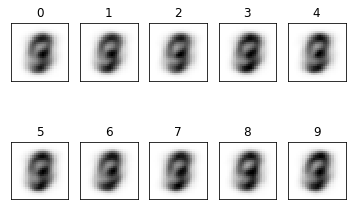

In [5]:
global_list_label_Kmean = initialise_label(global_number_of_cluster, global_num_image)
global_centroid = compute_centroid(global_number_of_cluster, global_list_label_Kmean, global_list_image)
f1 = plt.figure(1)
plot_centroid_image(global_centroid)

# caculate accuracy of init label
## define accuracy function

In [6]:
def compute_accuracy(list_label, list_true_label, number_of_cluster):
    set_klabel = compute_bool_table_label(number_of_cluster, list_label)
    set_true_label = compute_bool_table_label(number_of_cluster, list_true_label)
    """
     The label list of kmean algorithm may differ from true label list even if clustering is perfect 
     on basis of true label.

     forexample , there is the image list clustered by label 0 but consist of '2' shape. 
     In this situation , we think [label 0] represent number 2. 

     so, we can make the function :labelfunction 
     [0,...,KmeanLastLabel=9] to [0,...,LastLabel=9] ,one to one ,onto.
     in above situation labelfunction[0] = 2 . "0" is represent of 2.

      let T = number_of_cluster .
      sum_of_true_positive = \sum\limits_{i=0}^{T}{ TP[i,labelfunction[i]]}
      F1score = harmonic_average(precision ,recall)  ...because of several reasons 
       = sum_of_true_positive / number_of_image
     """
    number_of_image = np.shape(set_klabel)[1]
    # conpute RI * number_of_image
    TP = np.empty((number_of_cluster, number_of_cluster), dtype=float)
    for i in range(number_of_cluster):
        for j in range(number_of_cluster):
            TP[i, j] = np.sum(np.logical_and(set_klabel[j, :], set_true_label[i, :]))
    # since labelfunction is onetoone onto function It canbe represented by
    # permutation function : i.e. composition of Transpositions
    # Note that the number of Transpositions of [0,..,9] -> [0,..,9] is 45
    # It's very small number compared to 3628800 ( 10! )
    # multiply elementry matrixs (that represents Transposition) on left of RI and
    # get diogonal element of RI' = (U_k * ``` * U_1)*RI where    (U_k * ``` * U_1)=L is the labelfunction matrix
    # where [labelfunction(0),labelfunction(1),...labelfunction(9)].T = L[0,1,...,9].T
    # We can take assumtion that RI' has maximum trace
    RIprime = np.copy(TP)

    def rowswap_potential(row_index_i, row_index_j):
        start_value = RIprime[row_index_i, row_index_i] + RIprime[row_index_j, row_index_j]
        end_value = RIprime[row_index_j, row_index_i] + RIprime[row_index_i, row_index_j]
        return end_value - start_value

    def getnext_indextuple(i, j):
        if i < j:
            rei, rej = i, j
        else:
            rei, rej = j, i
        if rej + 1 == number_of_cluster:
            rei += 1
            rej = rei + 1
        else:
            rej += 1
        if rei == number_of_cluster - 1:
            return 0, 1
        return rei, rej

    indextuple = (0, 1)
    preventinfinityloops = 0
    np.array(range(number_of_cluster))
    Labelfunction = np.array(range(number_of_cluster))
    while True:
        if preventinfinityloops < 3628800:
            preventinfinityloops += 1
        else:
            print("Infinity LOOP ERROR")
            break
        if indextuple == (0, 1):
            count = 0
        if rowswap_potential(*indextuple) > 0:
            temp_for_irow = np.copy(RIprime[indextuple[0], :])
            RIprime[indextuple[0], :] = RIprime[indextuple[1], :]
            RIprime[indextuple[1], :] = temp_for_irow
            temp = Labelfunction[indextuple[0]]
            Labelfunction[indextuple[0]]=Labelfunction[indextuple[1]]
            Labelfunction[indextuple[1]] = temp
            count += 1
        indextuple = getnext_indextuple(*indextuple)
        if indextuple == (0, 1) and count == 0:
            break
    accuracy = np.trace(RIprime) / number_of_image
    return accuracy , Labelfunction# Label function is used for reordering labels

## mathematical discription for computing accuracy

### I will use F-1 score to represent accuracy
#### since there is no image that has no label or two and more label. 
#### we can compute the F-1 = ${number\_of\_label\_correect}\over{number\_image} $
### how to get label function
#### for every iteration caculating swap_potential ( more potential , more recomended for swaping)
#### if rowswap_potential(1,2) then the label located at first is changed label located second

## get first accuracy and append to accuarcy list 

In [7]:
accuracy_permutation = compute_accuracy(global_list_label_Kmean, global_list_label_true, global_number_of_cluster)
global_accuracy.append(accuracy_permutation[0])# accuracy
global_list_label_function = accuracy_permutation[1]# the label_function 
for i in range(global_num_image):# apply label_function (it does not affect clustering result but classification result)
    global_list_label_Kmean[i] =global_list_label_function[global_list_label_Kmean[i]]

if you replot the center it's result is differ from previous only respect to plotting order. it is not important so
I am going  to skip re-ploting.

# Compute energy 

In [8]:
def cacuclate_energy_matrix(centroid, list_image):
    number_of_cluster = np.shape(centroid)[1]
    num_image = np.shape(list_image)[1]
    distance_array = np.zeros((number_of_cluster, num_image))
    for i in range(num_image):
        for j in range(number_of_cluster):
            distance_array[j, i] = distance(centroid[:, j], list_image[:, i])
    return distance_array


global_energy_matrix = cacuclate_energy_matrix( global_centroid, global_list_image )


def compute_energy(energy_matrix, list_label):
    num_image = np.shape(energy_matrix)[0]
    energy = 0
    for i in range(num_image):
        energy += energy_matrix[list_label[i], i]
    return energy

previous_energy = compute_energy(global_energy_matrix, global_list_label_Kmean)
global_energy.append(previous_energy)

In [9]:
previous_energy = compute_energy(global_energy_matrix, global_list_label_Kmean)
global_energy.append(previous_energy)

# Kmean

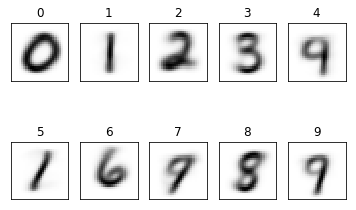

In [12]:
def assign_label(energy_matrix):
    num_image = np.shape(energy_matrix)[1]
    list_label = np.empty(num_image, dtype=int)
    for i in range(num_image):
        list_label[i] = np.argmin(energy_matrix[:, i], axis=0)
    return list_label
while (True):
    global_list_label_Kmean = assign_label(global_energy_matrix)
    accuracy_permutation = compute_accuracy(global_list_label_Kmean, global_list_label_true, global_number_of_cluster)
    global_accuracy.append(accuracy_permutation[0])
    global_list_label_function = accuracy_permutation[1]
    for i in range(global_num_image):
        global_list_label_Kmean[i] = global_list_label_function[global_list_label_Kmean[i]]
    global_centroid = compute_centroid(global_number_of_cluster,global_list_label_Kmean,global_list_image)
    global_energy_matrix = cacuclate_energy_matrix( global_centroid, global_list_image )
    current_energy = compute_energy(global_energy_matrix,global_list_label_Kmean)
    global_energy.append(current_energy)
    if current_energy == previous_energy:
        break
    previous_energy = current_energy
f2 = plt.figure(2)
plot_centroid_image(global_centroid)
plt.show()

# Energy Graph

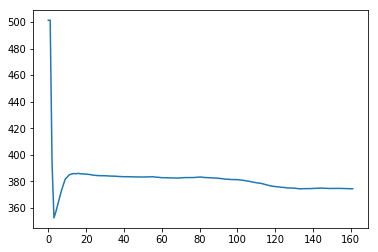

In [22]:
countlist = []
for i in range(len(global_energy)):
    countlist.append(i)
plt.plot(countlist,global_energy)
plt.show()

# Accuarcy Graph

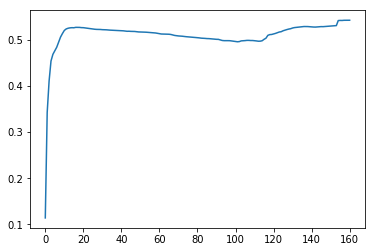

In [24]:
countlist2 = []
for i in range(len(global_accuracy)):
    countlist2.append(i)
plt.plot(countlist2,global_accuracy)
plt.show()